## Himanshu Baweja

## E20CSE212

## Week 8 Lab 2

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import rmsprop_v2
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

In [7]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### Design a model

In [9]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

### Compiling a Model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])

### Training

In [11]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.6650 - accuracy: 0.4785
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.8070 - accuracy: 0.7910
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4684 - accuracy: 0.8833
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3245 - accuracy: 0.9155
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2562 - accuracy: 0.9305
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2148 - accuracy: 0.9406
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1878 - accuracy: 0.9471
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1684 - accuracy: 0.9525
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1540 - accuracy: 0.9564
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1423 - accuracy: 0.9592

### Testing

In [12]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1575646847486496
Test accuracy: 0.9563000202178955


In [13]:
# Write the index of the test sample to test
prediction = model.predict(x_test[10:15])
prediction = prediction[1]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [1.1490672e-03 6.6591980e-05 3.6323261e-03 1.4480908e-05 8.8332389e-03
 5.6766905e-03 9.8047286e-01 8.4942030e-06 1.1836192e-04 2.7998181e-05]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


In [14]:
D=[4,32,128,512]
for i in range (4):
  first_layer_size = D[i]
  model = Sequential()
  model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
  model.add(Dense(num_classes, activation='softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
  history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
  score= model.evaluate(x_test, y_test)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.8842 - accuracy: 0.4721
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 1.4646 - accuracy: 0.6737
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 1.2044 - accuracy: 0.7317
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 1.0284 - accuracy: 0.7519
Epoch 5/10
469/469 [=======================

In [15]:
a1=[]
l=[3,4,6,8,16]
for i in range (5):
  first_layer_size = 32
  model = Sequential()
  model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
  for j in range(l[i]):
      model.add(Dense(first_layer_size, activation='sigmoid'))
  model.add(Dense(num_classes, activation='softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
  history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
  score= model.evaluate(x_test, y_test)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  a1.append(score[1]);

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [=========================

In [16]:
a2=[]
l=[3,4,6,8,16]
for i in range (5):
  first_layer_size = 32
  model = Sequential()
  model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
  for j in range(l[i]):
      model.add(Dense(first_layer_size, activation='sigmoid'))
  model.add(Dense(num_classes, activation='softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
  history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)
  score= model.evaluate(x_test, y_test)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  a2.append(score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                25120     
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [========================

In [17]:
a1=a1[:5]
a2=a2[:5]
print(a1)
print(a2)

[0.9447000026702881, 0.9319999814033508, 0.680899977684021, 0.8108999729156494, 0.11349999904632568]
[0.9591000080108643, 0.9437999725341797, 0.8823999762535095, 0.8515999913215637, 0.11349999904632568]


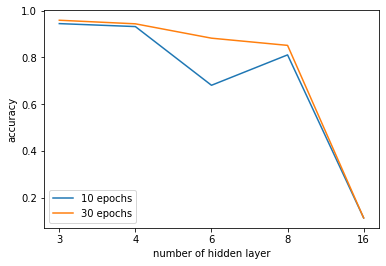

In [18]:
fig, ax = plt.subplots()
name = ['3','4','6','8','16']
ax.plot(name, a1, label = "10 epochs")
ax.plot(name, a2, label = "30 epochs")
plt.xlabel("number of hidden layer")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [19]:
a2=[]

model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 256)               200960    
                                                                 
 dense_107 (Dense)           (None, 128)               32896     
                                                                 
 dense_108 (Dense)           (None, 64)                8256      
                                                                 
 dense_109 (Dense)           (None, 32)                2080      
                                                                 
 dense_110 (Dense)           (None, 16)                528       
                                                                 
 dense_111 (Dense)           (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-t

In [20]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 32)                25120     
                                                                 
 dense_113 (Dense)           (None, 128)               4224      
                                                                 
 dense_114 (Dense)           (None, 256)               33024     
                                                                 
 dense_115 (Dense)           (None, 64)                16448     
                                                                 
 dense_116 (Dense)           (None, 16)                1040      
                                                                 
 dense_117 (Dense)           (None, 10)                170       
                                                                 
Total params: 80,026
Trainable params: 80,026
Non-tra

In [21]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 256)               200960    
                                                                 
 dense_119 (Dense)           (None, 32)                8224      
                                                                 
 dense_120 (Dense)           (None, 128)               4224      
                                                                 
 dense_121 (Dense)           (None, 16)                2064      
                                                                 
 dense_122 (Dense)           (None, 64)                1088      
                                                                 
 dense_123 (Dense)           (None, 10)                650       
                                                                 
Total params: 217,210
Trainable params: 217,210
Non-t

In [22]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 256)               200960    
                                                                 
 dense_125 (Dense)           (None, 128)               32896     
                                                                 
 dense_126 (Dense)           (None, 32)                4128      
                                                                 
 dense_127 (Dense)           (None, 16)                528       
                                                                 
 dense_128 (Dense)           (None, 64)                1088      
                                                                 
 dense_129 (Dense)           (None, 10)                650       
                                                                 
Total params: 240,250
Trainable params: 240,250
Non-t

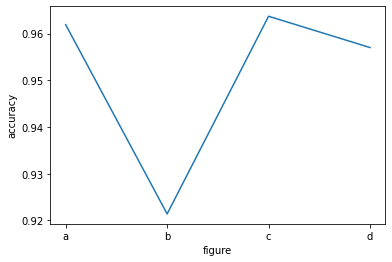

In [23]:
fig, ax = plt.subplots()
name = ['a','b','c','d']
ax.plot(name, a2)
plt.xlabel("figure")
plt.ylabel("accuracy")
plt.show()

In [24]:
a2=[]
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 128)               100480    
                                                                 
 dense_131 (Dense)           (None, 128)               16512     
                                                                 
 dense_132 (Dense)           (None, 128)               16512     
                                                                 
 dense_133 (Dense)           (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8165 - accuracy: 0.7590
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 

In [25]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 128)               100480    
                                                                 
 dense_135 (Dense)           (None, 128)               16512     
                                                                 
 dense_136 (Dense)           (None, 128)               16512     
                                                                 
 dense_137 (Dense)           (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3019 - accuracy: 0.9105
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 

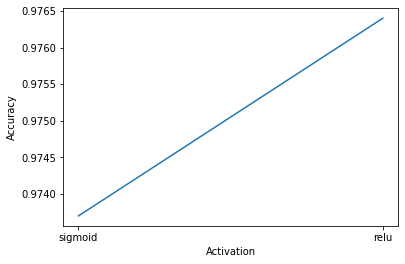

In [26]:
fig, ax = plt.subplots()
name = ['sigmoid','relu']
ax.plot(name, a2)
plt.xlabel("Activation")
plt.ylabel("Accuracy")
plt.show()

In [27]:
a2=[]
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 128)               100480    
                                                                 
 dense_139 (Dense)           (None, 128)               16512     
                                                                 
 dense_140 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6407 - accuracy: 0.8416
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2448 - accuracy: 0.9276
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1878 - accuracy: 0.9445
Epoch 

In [28]:
a2=[]
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 32)                25120     
                                                                 
 dense_142 (Dense)           (None, 32)                1056      
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.6189 - accuracy: 0.5085
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [29]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 32)                25120     
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 32)                1056      
                                                                 
 dense_148 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4535 - accuracy: 0.8747
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [30]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a2.append(score[1])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 32)                25120     
                                                                 
 dense_150 (Dense)           (None, 32)                1056      
                                                                 
 dense_151 (Dense)           (None, 32)                1056      
                                                                 
 dense_152 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.8766
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [31]:
a3=[]
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_153 (Dense)           (None, 32)                25120     
                                                                 
 dense_154 (Dense)           (None, 32)                1056      
                                                                 
 dense_155 (Dense)           (None, 32)                1056      
                                                                 
 dense_156 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 1.5668 - accuracy: 0.5104
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [32]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 32)                25120     
                                                                 
 dense_158 (Dense)           (None, 32)                1056      
                                                                 
 dense_159 (Dense)           (None, 32)                1056      
                                                                 
 dense_160 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.4716 - accuracy: 0.8667
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.

In [33]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 32)                25120     
                                                                 
 dense_162 (Dense)           (None, 32)                1056      
                                                                 
 dense_163 (Dense)           (None, 32)                1056      
                                                                 
 dense_164 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.4573 - accuracy: 0.8831
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.

[0.9563999772071838, 0.9638000130653381, 0.9670000076293945]
[0.9580000042915344, 0.9724000096321106, 0.9714000225067139]


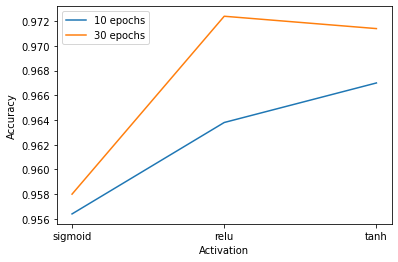

In [34]:
print(a2)
print(a3)
fig, ax = plt.subplots()
name = ['sigmoid','relu','tanh']
ax.plot(name, a2, label = "10 epochs")
ax.plot(name, a3, label = "30 epochs")
plt.xlabel("Activation")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
a3=[]
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 32)                25120     
                                                                 
 dense_166 (Dense)           (None, 32)                1056      
                                                                 
 dense_167 (Dense)           (None, 32)                1056      
                                                                 
 dense_168 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8342 - accuracy: 0.7915
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.

In [36]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 32)                25120     
                                                                 
 dense_170 (Dense)           (None, 32)                1056      
                                                                 
 dense_171 (Dense)           (None, 32)                1056      
                                                                 
 dense_172 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7971 - accuracy: 0.8098
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [37]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_173 (Dense)           (None, 32)                25120     
                                                                 
 dense_174 (Dense)           (None, 32)                1056      
                                                                 
 dense_175 (Dense)           (None, 32)                1056      
                                                                 
 dense_176 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6459 - accuracy: 0.8313
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.

In [38]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 32)                25120     
                                                                 
 dense_178 (Dense)           (None, 32)                1056      
                                                                 
 dense_179 (Dense)           (None, 32)                1056      
                                                                 
 dense_180 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6701 - accuracy: 0.8260
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [39]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 32)                25120     
                                                                 
 dense_182 (Dense)           (None, 32)                1056      
                                                                 
 dense_183 (Dense)           (None, 32)                1056      
                                                                 
 dense_184 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6362 - accuracy: 0.8400
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

In [40]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)
score= model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
a3.append(score[1])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 32)                25120     
                                                                 
 dense_186 (Dense)           (None, 32)                1056      
                                                                 
 dense_187 (Dense)           (None, 32)                1056      
                                                                 
 dense_188 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8116 - accuracy: 0.8337
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.

[0.9606000185012817, 0.9638000130653381, 0.9642999768257141, 0.9628000259399414, 0.9682999849319458, 0.9645000100135803]


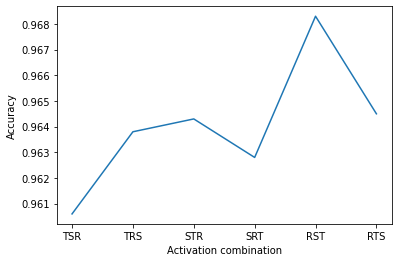

In [41]:
print(a3)
fig, ax = plt.subplots()
name = ['TSR','TRS','STR','SRT','RST','RTS']
ax.plot(name, a3)
plt.xlabel("Activation combination")
plt.ylabel("Accuracy")
plt.show()